# Project: Wrangling and Analyze Data By Chinedu Uzorue

## Table of Content

1. [Data Gathering](#dg)
2. [Assessing Data](#ad)
3. [Cleaning Data](#cd)
4. [Storing Data](#sd)
5. [Analyzing and Visualizing Data](#avd)

## Data Gathering

<a id="dg"></a>
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

### Import necessary packages

In [1]:
import pandas as pd
import numpy as np
import requests as re
import json
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [2]:
tw_archive = pd.read_csv('twitter-archive-enhanced.csv')
#tw_archive.tweet_id.values

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = re.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

2b. Store the contents of 'image-predictions.tsv' into a pandas dataframe

In [4]:
img_prd = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt) <br />
**Comment:** I could not get my Twitter Developer request approved, so I used the provided txt file

In [5]:
#Create an empty list to be populated with the content of the txt file [encoding='utf-8']
temp_df = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        temp_df.append(json.loads(line))

In [6]:
#Check the list just created
print(temp_df[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [7]:
#Here we create a dataframe from the list created above with 3 columns (id, retweet_count and favorite_count)

twitter_data = pd.DataFrame(temp_df, columns=['id','retweet_count','favorite_count'])

#rename "id" column to "tweet_id"
twitter_data.rename(columns={'id':'tweet_id'}, inplace=True)


## Assessing Data

<a id="ad"></a>
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### a. Assessing the `twitter_data` dataframe

In [8]:
#Check the newly created dataframe based off 
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [9]:
twitter_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [10]:
twitter_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [11]:
#check for any duplicates
twitter_data.duplicated().sum()

0

### b. Assessing the `tw_archive` dataframe

In [12]:
#check the twitter archive dataframe
tw_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
#check for any duplicate
tw_archive.duplicated().sum()

0

In [14]:
#check the rating_numerator column
tw_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
#check the rating_denominator column
tw_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
#Taking off tweets beyond August 1st 2017
tw_archive = tw_archive[tw_archive['timestamp']<"2017-08-01"]
#tw_archive.drop(tw_archive2.index, inplace=True)
tw_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 2 to 2355
Data columns (total 17 columns):
tweet_id                      2354 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2354 non-null object
source                        2354 non-null object
text                          2354 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2295 non-null object
rating_numerator              2354 non-null int64
rating_denominator            2354 non-null int64
name                          2354 non-null object
doggo                         2354 non-null object
floofer                       2354 non-null object
pupper                        2354 non-null object
puppo                         2354 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
tw_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None


In [18]:
tw_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.354000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2354.000000,2354.00000
mean,7.426445e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126593,10.45582
std,6.845740e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.896140,6.74809
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.00000
25%,6.783975e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.00000
50%,7.194596e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.00000
75%,7.992387e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.00000
max,8.918152e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.00000


### c. Assessing the `img_prd` dataframe

In [19]:
#check the image prediction dataframe
img_prd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
img_prd.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
img_prd.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
#check for any duplicates
img_prd.duplicated().sum()

0

### Quality issues 

**These are issues that involve the content of the data e.g completeness of the data, accuracy of the data, is the data format consistent, etc.**

>General
1. The `tweet_id` column type is integer instead of string (object type)

>Image Prediction file (`img_prd`)
2. There are only **2075** entries instead of **2356** (missing values issue)
3. In the **"p1", "p2", and "p3"** columns, the names are separated by an underscore "_" instead of a whitespace (validity issue)
4. In the **"p1", "p2", and "p3"** columns, some breed names begin with Upper case letters whereas some begin with lower case letters (consistency issue)
 
>Twitter API file (`twitter_data`)
5. There are only **2354** values instead of **2356** (missing values issue)

>Twitter archive file (`tw_archive`)
6. Some names are invalid e.g "a", "an", "None", "incredibly", "quite" etc 
7. (a). Row with `tweet_id` **"666287406224695000"** shows a `rating_numerator` of 1 and `rating_denominator` of 2, however on careful observation, the text states that the rating is 9/10, so `rating_numerator` should be 9 and `rating_denominator` 10
   <br />(b). Row with `tweet_id` **"835246439529840000"** shows a `rating_numerator` of 960 and `rating_denominator` of 0 i.e rating is 960/0, this is invalid, as stated in the text column
8. The `timestamp` column has trailing "+0000"
9. The `timestamp` column type is string instead of datetime
10. There are **181** tweets that are retweets and **78** replies to tweets that need to be deleted



### Tidiness issues
1. Four redundant columns in `tw_archive` dataframe - doggo, floofer, pupper, and puppo - This goes against the second condition for tidy data (every column must be a variable)

2. The 3 dataframes are all related but separated which is an example of messy/untidy data as documented in [the tidy data documentation](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) - _A single observational unit is stored in multiple tables._

## Cleaning Data

<a id="cd"></a>
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [23]:
# Make copies of original pieces of data
twitter_data_clean = twitter_data.copy()
tw_archive_clean = tw_archive.copy()
img_prd_clean = img_prd.copy()

### Issue #1: The tweet_id column type is integer instead of string (object type)

#### Define
Change the tweet_id datatype in the 3 dataframes to string

#### Code

In [24]:
twitter_data_clean.tweet_id = twitter_data_clean.tweet_id.astype(str)
tw_archive_clean.tweet_id = tw_archive_clean.tweet_id.astype(str)
img_prd_clean.tweet_id = img_prd_clean.tweet_id.astype(str)

#### Test

In [25]:
#s1 = "The dataype of tweet id in the twitter_data_clean dataframe is "
#s2 = "The dataype of tweet id in the tw_archive_clean dataframe is " 
#s3 = "The dataype of tweet id in the img_prd_clean dataframe is "

#Check the datatypes
print(twitter_data_clean.tweet_id.dtypes)
print(tw_archive_clean.tweet_id.dtypes)
print(img_prd_clean.tweet_id.dtypes)

object
object
object


### Issue #3: In the "p1", "p2", and "p3" columns, the names are separated by an underscore "_" instead of a whitespace (validity issue)

#### Define:

Replace underscores in columns p1, p2 and p3 of `img_prd` dataframe to whitespace

#### Code:

In [26]:
img_prd_clean['p1'] = img_prd_clean['p1'].str.replace('_', " ")
img_prd_clean['p2'] = img_prd_clean['p2'].str.replace('_', " ")
img_prd_clean['p3'] = img_prd_clean['p3'].str.replace('_', " ")

#### Test: 

In [27]:
img_prd_clean['p1'].sample(5)

212                      pot
690                Chihuahua
1620                    chow
1537    Bernese mountain dog
1820     Rhodesian ridgeback
Name: p1, dtype: object

### Issue #4: In the "p1", "p2", and "p3" columns, some breed names begin with Upper case letters whereas some begin with lower case letters (consistency issue)

#### Define:
Make all breed names title case

#### Code

In [28]:
img_prd_clean['p1'] = img_prd_clean['p1'].str.title()
img_prd_clean['p2'] = img_prd_clean['p2'].str.title()
img_prd_clean['p3'] = img_prd_clean['p3'].str.title()

#### Test

In [29]:
img_prd_clean['p1'].sample(5)

1644        Golden Retriever
703            Shopping Cart
1470              Toy Poodle
2058        Golden Retriever
849     Old English Sheepdog
Name: p1, dtype: object

### Issue #6: Some names are invalid e.g "a", "an", "None", "incredibly", "quite" etc

#### Define:

Replace the invalide names with NaN

#### Code:


In [30]:
invalid_n = ['a','all','an','by','getting','his','incredibly','infuriating','just','life','None','my','not','one','the']
tw_archive_clean.name.replace(invalid_n, np.nan, inplace=True)

#### Test:


In [31]:
tw_archive_clean.name[tw_archive_clean.name=="all"]

Series([], Name: name, dtype: object)

### Issue #7: Row with tweet_id "666287406224695000" shows a rating_numerator of 1 and rating_denominator of 2, however on careful observation, the text states that the rating is 9/10, so rating_numerator should be 9 and rating_denominator 10

#### Define:

Since **2331** values out of a total of **2354** values of the rating_denominator are 10, we can force all denominators to 10 <br />
Make the rating_numerator of tweet_id "666287406224695000" to 9

#### Code:

In [32]:
#Force all rating_denominator values to 10
tw_archive_clean['rating_denominator'] = 10


#Force all rating_numerator values to 20: since most scores are less than or equal to 20
tw_archive_clean.loc[tw_archive_clean['rating_numerator']>20, 'rating_numerator'] = 20

#Force the rating_numerator value of tweet_id "666287406224695000" to 9
tw_archive_clean.query("tweet_id == '666287406224695000'").rating_numerator = 9

#### Test:

In [33]:
tw_archive_clean.rating_denominator.value_counts()

10    2354
Name: rating_denominator, dtype: int64

In [34]:
tw_archive_clean.rating_numerator.value_counts()

12    558
11    464
10    461
13    349
9     158
8     102
7      55
14     54
5      37
6      32
20     25
3      19
4      17
1       9
2       9
0       2
15      2
17      1
Name: rating_numerator, dtype: int64

In [35]:
#tw_archive_clean.loc[tw_archive_clean["tweet_id"] == 666287406224695000]
#check if tweet_id 666287406224695000 is still in the dataframe
tw_archive_clean.query('tweet_id == "666287406224695000"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #8: The timestamp column has trailing "+0000"

#### Define:

Strip off trailing "+0000" in timestamp column

#### Code:

In [36]:
#Strip off trailing "+0000"
tw_archive_clean.timestamp = tw_archive_clean['timestamp'].str[:-5].str.strip()


#### Test:

In [37]:
tw_archive_clean.timestamp.sample(5)

1629    2016-01-06 02:49:55
692     2016-10-15 02:04:45
1249    2016-03-19 21:41:44
287     2017-03-06 01:26:54
1203    2016-04-02 15:25:47
Name: timestamp, dtype: object

### Issue #9: The timestamp column type is string instead of datetime

#### Define:

Change the datatype of timestamp to datetime

#### Code:

In [38]:
#convert timestamp datatype to datetime
tw_archive_clean['timestamp'] = pd.to_datetime(tw_archive_clean['timestamp'])

#change the name of column "timestamp" to "tweet_date"
#convert timestamp datatype to datetime
tw_archive_clean.rename(columns={'timestamp':'tweet_date'}, inplace=True)

#### Test:

In [39]:
tw_archive_clean['tweet_date'].dtypes

dtype('<M8[ns]')

### Issue #10: There are 181 tweets that are retweets and need to be deleted

#### Define:

Delete records that are retweets in the `tw_archive` dataframe and drop the following columns: <br /> 
- retweeted_status_id
- retweeted_status_user_id      
- retweeted_status_timestamp 
- in_reply_to_status_id        
- in_reply_to_user_id 

#### Code

In [40]:
#Filter off rows with retweet status
tw_archive_clean.drop(tw_archive_clean[tw_archive_clean.retweeted_status_id.notnull()].index, inplace = True)

#Filter off rows with in_reply status
tw_archive_clean.drop(tw_archive_clean[tw_archive_clean.in_reply_to_status_id.notnull()].index, inplace = True)

#Drop columns relating to retweet status
tw_archive_clean.drop(columns=['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], inplace = True)

#### Test

In [41]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 2 to 2355
Data columns (total 12 columns):
tweet_id              2095 non-null object
tweet_date            2095 non-null datetime64[ns]
source                2095 non-null object
text                  2095 non-null object
expanded_urls         2092 non-null object
rating_numerator      2095 non-null int64
rating_denominator    2095 non-null int64
name                  1405 non-null object
doggo                 2095 non-null object
floofer               2095 non-null object
pupper                2095 non-null object
puppo                 2095 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 212.8+ KB


### Tidyness Issue #1: Four redundant columns in tw_archive dataframe - doggo, floofer, pupper, and puppo

#### Define:

Combine the 4 columns to one

#### Code

In [42]:
tw_archive_clean = tw_archive_clean.melt(id_vars=['tweet_id','tweet_date','source','text','expanded_urls',
                                                  'rating_numerator','rating_denominator','name'], 
                                         var_name='dog_stage', value_name='val_name')

tw_archive_clean = tw_archive_clean[tw_archive_clean.val_name != "None"]


#tw_archive_clean2 = tw_archive_clean[tw_archive_clean.dog_stage == "None"]


#### Test

In [43]:
tw_archive_clean

,tweet_id,tweet_date,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,val_name
7,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,doggo
37,884162670584377345,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,doggo
84,872967104147763200,2017-06-09 00:02:31,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,NaN,doggo,doggo
92,871515927908634625,2017-06-04 23:56:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,doggo
93,871102520638267392,2017-06-03 20:33:19,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,14,10,NaN,doggo,doggo
102,869596645499047938,2017-05-30 16:49:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,doggo
141,858843525470990336,2017-05-01 00:40:27,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,https://twitter.com/dog_rates/status/858843525...,13,10,NaN,doggo,doggo
152,855851453814013952,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,NaN,doggo,doggo
159,854010172552949760,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,NaN,doggo,doggo
190,846514051647705089,2017-03-28 00:07:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Barney. He's an elder doggo. Hitches a...,https://twitter.com/dog_rates/status/846514051...,13,10,Barney,doggo,doggo


In [44]:
#Drop the val_name columns
tw_archive_clean.drop(columns={'val_name'}, inplace=True)

In [45]:
tw_archive_clean['dog_stage'].value_counts()

pupper     230
doggo       83
puppo       24
floofer     10
Name: dog_stage, dtype: int64

In [46]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 7 to 7150
Data columns (total 9 columns):
tweet_id              347 non-null object
tweet_date            347 non-null datetime64[ns]
source                347 non-null object
text                  347 non-null object
expanded_urls         346 non-null object
rating_numerator      347 non-null int64
rating_denominator    347 non-null int64
name                  190 non-null object
dog_stage             347 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 27.1+ KB


### Tidyness Issue #2: The 3 dataframes are all related but separated which is an example of messy/untidy data as documented in the tidy data documentation

#### Define:

Merge the 3 dataframes to one using the tweet_id column

#### Code:


In [47]:
#First merge the twitter_data_clean and tw_archive_clean dataframes
tw_archive_clean = pd.merge(tw_archive_clean, twitter_data_clean,
                            on=['tweet_id'], how='left')

In [48]:
#Next merge the tw_archive_clean1 and img_prd_clean dataframes dropping any unnecessary column
tw_archive_clean = pd.merge(tw_archive_clean, img_prd_clean,
                            on=['tweet_id'], how='left')

#### Test

In [49]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 0 to 346
Data columns (total 22 columns):
tweet_id              347 non-null object
tweet_date            347 non-null datetime64[ns]
source                347 non-null object
text                  347 non-null object
expanded_urls         346 non-null object
rating_numerator      347 non-null int64
rating_denominator    347 non-null int64
name                  190 non-null object
dog_stage             347 non-null object
retweet_count         347 non-null int64
favorite_count        347 non-null int64
jpg_url               313 non-null object
img_num               313 non-null float64
p1                    313 non-null object
p1_conf               313 non-null float64
p1_dog                313 non-null object
p2                    313 non-null object
p2_conf               313 non-null float64
p2_dog                313 non-null object
p3                    313 non-null object
p3_conf               313 non-null float64
p3_do

## Storing Data

<a id="sd"></a>
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [50]:
#store the t_data to a csv file

tw_archive_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

<a id="avd"></a>
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [51]:
df = pd.read_csv('twitter_archive_master.csv')

### Insights:
1. Which dog stage has the highest likes (favorite_count)?

2. What is the dog stage with the highest retweets?

3. Which dog stage has the highest average rating?

4. What is the name of the most famous dog?

### Visualization

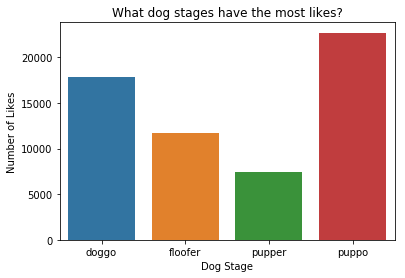

In [52]:
#To answer question 1: Which dog stage has the highest likes (favorite_count)?
#I will plot a barchart with the Dog stages (df.dog_stages) on the horizontal (x-axis) and the Number of likes (df_favorite_count) on the vertical (y-axis)
sns.barplot(x = 'dog_stage', y = 'favorite_count', data = df, ci=None)
plt.title('What dog stages have the most likes?')
plt.xlabel('Dog Stage')
plt.ylabel('Number of Likes')
plt.savefig('figure1.png', dpi=200);

> **Insight:** The barchart shows that dogs in the "puppo" stage had the most likes, followed by "doggo" dogs while "pupper" dogs had the lowest likes

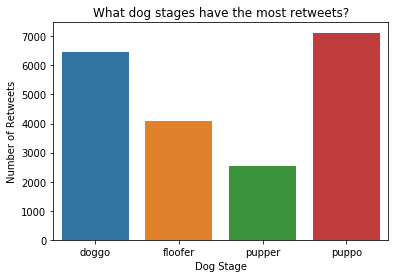

In [53]:
#To answer question 2: What is the dog stage with the highest retweets?
#I will plot another barchart
#Here the Dog stages (df.dog_stages) will be on the x-axis and the Number of retweets (df.retweet_count) on the y-axis
sns.barplot(x = 'dog_stage', y = 'retweet_count', data = df, ci=None)
plt.title('What dog stages have the most retweets?')
plt.xlabel('Dog Stage')
plt.ylabel('Number of Retweets')
plt.savefig('figure2.png', dpi=200);

> **Insight:** Again, dogs in the "puppo" category have the most retweets, followed closely by "doggo" dogs and "floofer" dogs before "puppers".

In [54]:
#Create new column for rating
df['rating'] = df['rating_numerator']/df['rating_denominator']

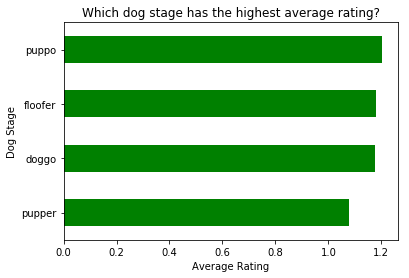

In [55]:
#To answer question 3: Which dog stage has the highest average rating?
#Instead of a normal barchart, I will use a horizontal barchart



#function to add labels to the barchart
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

df.groupby('dog_stage')['rating'].mean().sort_values().plot(kind='barh',color='g')
plt.title('Which dog stage has the highest average rating?')
plt.ylabel('Dog Stage')
plt.xlabel('Average Rating')
plt.savefig('figure3.png', dpi=200);

> **Insight:** The competition here is very tight. "Puppo" dogs have the highest average rating, followed closely by "floofer" dogs, then "doggo" dogs and lastly "puppers".

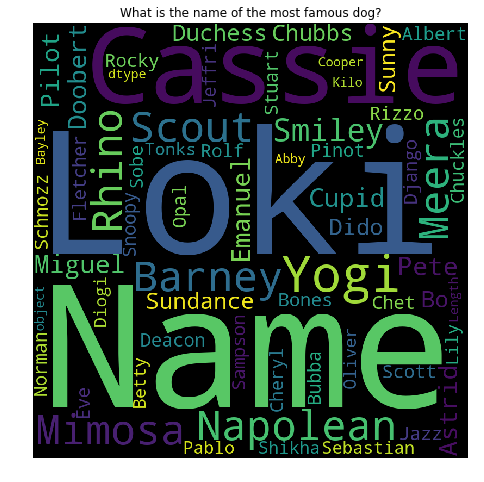

In [56]:
#To answer question 4: What is the name of the most famous dog?
#I will use a wordcloud

df = df.dropna()
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                min_font_size = 10).generate(str(df.name))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.title('What is the name of the most famous dog?')
plt.axis("off")
plt.show()
plt.savefig('figure4.png', dpi=200);

> **Insight:** From the word cloud, the name "Loki" stands out, so the most famous dog name is **"Loki"**